In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from scipy.constants import c
from scipy.optimize import curve_fit

#%matplotlib qt

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
f_carrier = 2216499173.1849303

f_carrier1 = 2216499173.1849303 - 22727.20460527

f_carrier2 = 2216499173.1849303 - 45454.42960526

print(f_carrier - f_carrier1)
print(f_carrier - f_carrier2)


22727.20460510254
45454.42960548401


In [3]:
data = np.fromfile('/media/scott/fast/data/20221119/center.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
int_data = data[:,2]

In [4]:
#load lower1 carrier data
data1 = np.fromfile('/media/scott/fast/data/20221119/lower1.dat', sep = ' ').reshape((-1,4))
t_data1 = Time(data1[:,0], format = 'mjd')
freq_data1 = data1[:,1]
int_data1 = data1[:,2]
lower1 = 1

In [5]:
#load lower2 carrier data
data2 = np.fromfile('/media/scott/fast/data/20221119/lower2.dat', sep = ' ').reshape((-1,4))
t_data2 = Time(data2[:,0], format = 'mjd')
freq_data2 = data2[:,1]
int_data2 = data2[:,2]
lower2 = 1

In [6]:
gmd_file = '/home/scott/code/GMAT/R2020a/output/Artemis1_Doppler.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

In [7]:
rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

In [8]:
#lower1 carrier
rangerate_interp1 = np.interp(t_data1.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat1 = f_carrier1 * (1 - 1e3*rangerate_interp1/c)

freq_diff1 = freq_data1 - freq_gmat1
np_diff1 = np.array(freq_diff1)

In [9]:
#lower2 carrier
rangerate_interp2 = np.interp(t_data2.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat2 = f_carrier2 * (1 - 1e3*rangerate_interp2/c)

freq_diff2 = freq_data2 - freq_gmat2
np_diff2 = np.array(freq_diff2)

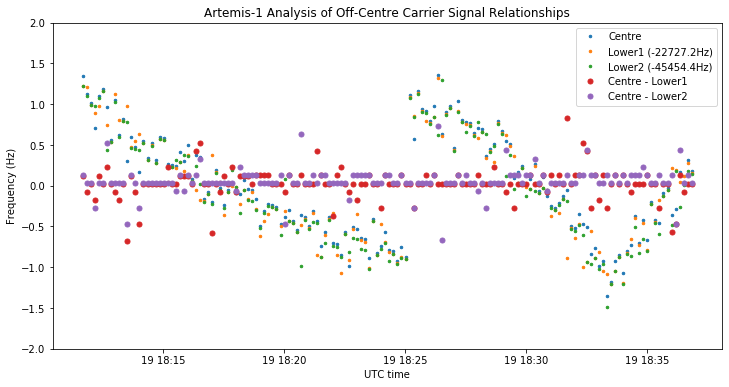

In [19]:
plt.plot(t_data.datetime, np_diff,'.',markersize=5,  label = 'Centre')
plt.plot(t_data1.datetime, np_diff1 ,'.',markersize=5,  label = 'Lower1 (-22727.2Hz)')
plt.plot(t_data2.datetime, np_diff2,'.',markersize=5,  label = 'Lower2 (-45454.4Hz)')
plt.ylim(np.min(-2),np.max(2))
plt.plot(t_data.datetime, np_diff-np_diff1,'.',markersize=10,  label = 'Centre - Lower1')
plt.plot(t_data.datetime, np_diff-np_diff2,'.',markersize=10,  label = 'Centre - Lower2')
plt.title('Artemis-1 Analysis of Off-Centre Carrier Signal Relationships')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.show();